In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [6]:
data = pd.read_csv('RFM data.csv')

In [7]:
data.shape

(392735, 9)

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [10]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,392735.000000,392735.000000,392735.000000,392735.000000,392735.000000
mean,560624.318859,10.242645,2.787111,15300.835136,18.246537
std,13113.076784,16.172009,2.704759,1709.095993,32.558080
min,536365.000000,1.000000,0.120000,12347.000000,0.120000
25%,549233.000000,2.000000,1.250000,13975.000000,4.680000
50%,561894.000000,5.000000,1.950000,15159.000000,11.700000
75%,572103.000000,12.000000,3.750000,16800.000000,19.500000
max,581587.000000,147.000000,19.960000,18287.000000,1914.240000


In [11]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

## Task 1: Calculate the 
### a) recency (R), b) frequency (F) c) monetary value (M) for each customer based on the given dataset?

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
# Converting InvoiceDate to datetime format.
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

#### Calculate Recency

In [17]:
data['Recency']=(datetime.now().date()-data.InvoiceDate.dt.date)/np.timedelta64(1,'D')

In [21]:
data.Recency.head()

0    4743.0
1    4743.0
2    4743.0
3    4743.0
4    4743.0
Name: Recency, dtype: float64

#### Calculate Frequency

In [22]:
freq_df=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [23]:
freq_df.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [29]:
freq_df.head()

,CustomerID,Frequency
0,12347.0,181
1,12348.0,27
2,12349.0,71
3,12350.0,16
4,12352.0,77


In [24]:
data=data.merge(freq_df,on="CustomerID",how="left")

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,4743.0,289
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,4743.0,289
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289


#### Calculate Monetary Value

In [30]:
monetary=data.groupby("CustomerID")['TotalPrice'].sum().reset_index()

In [31]:
monetary.rename(columns={'TotalPrice':'MonetaryValue'},inplace=True)

In [32]:
data=data.merge(monetary,on="CustomerID",how="left")

In [33]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,MonetaryValue
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,4743.0,289,4783.46
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,4743.0,289,4783.46
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46


## Task 3: 
### a) Calculate RFM scores. Each customer will get a note between 1 and 5 for each parameter for Recency(R), Frequency(F) and Monetary value(M)

In [34]:
# Define Scales for RFM Value or RFM Score
recency_scale=[5,4,3,2,1]
frequency_scale=[1,2,3,4,5]
monetary_scale=[1,2,3,4,5]

In [35]:
data['RecencyScore']=pd.cut(data.Recency,bins=5,labels=recency_scale)

In [36]:
data['FrequencyScore']=pd.cut(data.Frequency,bins=5,labels=frequency_scale)

In [37]:
data['MonetaryScore']=pd.cut(data.MonetaryValue,bins=5,labels=monetary_scale)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392735 entries, 0 to 392734
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392735 non-null  int64         
 1   StockCode       392735 non-null  object        
 2   Description     392735 non-null  object        
 3   Quantity        392735 non-null  int64         
 4   InvoiceDate     392735 non-null  datetime64[ns]
 5   UnitPrice       392735 non-null  float64       
 6   CustomerID      392735 non-null  float64       
 7   Country         392735 non-null  object        
 8   TotalPrice      392735 non-null  float64       
 9   Recency         392735 non-null  float64       
 10  Frequency       392735 non-null  int64         
 11  MonetaryValue   392735 non-null  float64       
 12  RecencyScore    392735 non-null  category      
 13  FrequencyScore  392735 non-null  category      
 14  MonetaryScore   392735 non-null  cat

In [40]:
data.RecencyScore=data.RecencyScore.astype(int)
data.FrequencyScore=data.FrequencyScore.astype(int)
data.MonetaryScore=data.MonetaryScore.astype(int)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392735 entries, 0 to 392734
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392735 non-null  int64         
 1   StockCode       392735 non-null  object        
 2   Description     392735 non-null  object        
 3   Quantity        392735 non-null  int64         
 4   InvoiceDate     392735 non-null  datetime64[ns]
 5   UnitPrice       392735 non-null  float64       
 6   CustomerID      392735 non-null  float64       
 7   Country         392735 non-null  object        
 8   TotalPrice      392735 non-null  float64       
 9   Recency         392735 non-null  float64       
 10  Frequency       392735 non-null  int64         
 11  MonetaryValue   392735 non-null  float64       
 12  RecencyScore    392735 non-null  int32         
 13  FrequencyScore  392735 non-null  int32         
 14  MonetaryScore   392735 non-null  int

#### creating RFM score

In [51]:
data['rfm_score']=data.RecencyScore+data.FrequencyScore+data.MonetaryScore

In [52]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Customer_Segment,rfm_Segment,rfm_score
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,4743.0,289,4783.46,1,1,1,High_Value,Champions,3
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46,1,1,1,High_Value,Champions,3
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,4743.0,289,4783.46,1,1,1,High_Value,Champions,3
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46,1,1,1,High_Value,Champions,3
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46,1,1,1,High_Value,Champions,3


### b) Segment the customers based on their RFM scores using the dataset?

In [53]:
segment_labels=["Low_Value","Medium_Value","High_Value"]

data["Customer_Segment"]=pd.qcut(data.rfm_score,q=3,labels=segment_labels)

In [60]:
data.drop('rfm_Segment',axis = 1, inplace = True)

In [62]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Customer_Segment,rfm_score
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,4743.0,289,4783.46,1,1,1,Low_Value,3
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46,1,1,1,Low_Value,3
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,4743.0,289,4783.46,1,1,1,Low_Value,3
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46,1,1,1,Low_Value,3
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4743.0,289,4783.46,1,1,1,Low_Value,3


In [63]:
def assign_segment(row):
    if 4 <= row['RecencyScore'] <= 5 and 4 <= row['FrequencyScore'] <= 5 and 4 <= row['MonetaryScore'] <= 5:
        return 'Champions'
    elif 3 <= row['RecencyScore'] <= 5 and 3 <= row['FrequencyScore'] <= 5 and 3 <= row['MonetaryScore'] <= 5:
        return 'Loyal customers'
    elif 4 <= row['RecencyScore'] <= 5 and 2 <= row['FrequencyScore'] <= 3 and 2 <= row['MonetaryScore'] <= 3:
        return 'Potential loyalist'
    elif 4 <= row['RecencyScore'] <= 5 and 1 <= row['FrequencyScore'] <= 2 and 1 <= row['MonetaryScore'] <= 2:
        return 'Recent customers'
    elif 4 <= row['RecencyScore'] <= 5 and 1 <= row['FrequencyScore'] <= 2 and 1 <= row['MonetaryScore'] <= 2:
        return 'Promising'
    elif 3 <= row['RecencyScore'] <= 5 and 3 <= row['FrequencyScore'] <= 5 and 3 <= row['MonetaryScore'] <= 5:
        return 'Needs attention'
    elif 1 <= row['RecencyScore'] <= 2 and 1 <= row['FrequencyScore'] <= 2 and 1 <= row['MonetaryScore'] <= 2:
        return 'About to sleep'
    elif 2 <= row['RecencyScore'] <= 5 and 1 <= row['FrequencyScore'] <= 3 and 1 <= row['MonetaryScore'] <= 3:
        return 'At risk'
    elif 1 <= row['RecencyScore'] <= 3 and 4 <= row['FrequencyScore'] <= 5 and 4 <= row['MonetaryScore'] <= 5:
        return "Can't lose them"
    elif 1 <= row['RecencyScore'] <= 2 and 1 <= row['FrequencyScore'] <= 2 and 1 <= row['MonetaryScore'] <= 2:
        return 'Hibernating'
    else:
        return 'Other'

data['Segment'] = data.apply(assign_segment, axis=1)

        CustomerID  RecencyScore  FrequencyScore  MonetaryScore  \
0          17850.0             1               1              1   
1          17850.0             1               1              1   
2          17850.0             1               1              1   
3          17850.0             1               1              1   
4          17850.0             1               1              1   
...            ...           ...             ...            ...   
392730     12680.0             5               1              1   
392731     12680.0             5               1              1   
392732     12680.0             5               1              1   
392733     12680.0             5               1              1   
392734     12680.0             5               1              1   

                 Segment  
0         About to sleep  
1         About to sleep  
2         About to sleep  
3         About to sleep  
4         About to sleep  
...                  ...  
392730

In [65]:
data.Segment.value_counts()

Recent customers      192378
About to sleep        110582
At risk                66207
Other                  15616
Champions               3626
Potential loyalist      2410
Can't lose them         1113
Loyal customers          803
Name: Segment, dtype: int64

## Task 4: 
### a) Visualize the RFM segments

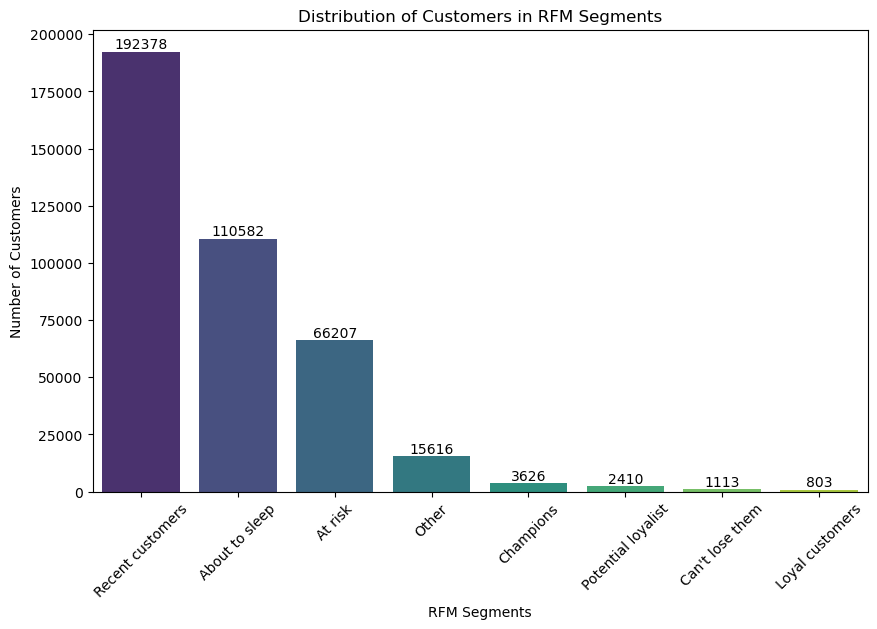

In [67]:
segment_counts = data['Segment'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Distribution of Customers in RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

### b) Conclude your findings of RFM analysis and suggest some strategies on it.

#### Findings:

**Champions:**
- Strategies: Focus on loyalty programs and personalized communication.

**Loyal Customers:**
- Strategies: Maintain engagement, provide special rewards, and encourage advocacy.

**Potential Loyalists:**
- Strategies: Incentivize increased frequency and spending through targeted promotions.

**Recent Customers and Promising:**
- Strategies: Nurture with onboarding campaigns and incentives for repeat business.

**Needs Attention:**
- Strategies: Implement re-engagement campaigns and address any issues.

**About to Sleep:**
- Strategies: Implement win-back campaigns with special promotions.

**At Risk:**
- Strategies: Implement targeted campaigns to prevent churn.

**Can't Lose Them:**
- Strategies: Re-engage through personalized offers and loyalty programs.

**Hibernating:**
- Strategies: Implement reactivation campaigns with special incentives.


#### Overall Strategies:

**Personalization:** Tailor marketing based on each segment's preferences.

**Loyalty Programs:** Enhance programs to reward and retain high-value customers.

**Targeted Campaigns:** Develop campaigns for reactivation, upselling, and cross-selling.

**Feedback Collection:** Gather feedback to understand expectations.

**Customer Service:** Address issues promptly to build long-term relationships.

**Segment-Specific Offers:** Design promotions that resonate with each segment.

**Continuous Monitoring:** Regularly update strategies based on evolving customer behavior.